In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML
%matplotlib inline

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
df=pd.read_csv('sample2.csv')
X,y=df.drop('gz_pln_share',axis=1), df[['gz_pln_share']]

## Eksploracyjna analiza danych

In [4]:
print('Wymiary tabeli : {}'.format(df.shape))

Wymiary tabeli : (19982, 20)


In [5]:
df.head()

,market_segment,vovoideship,exhibition_places_gz_12m_mean,exhibition_places_competitor_12m_mean,price_gz_brand1_bottle,price_competitor_brand1_bottle,price_gz_brand2_bottle,price_competitor_brand2_bottle,price_gz_brand3_bottle,price_gz_brand3_can,price_competitor_brand3_bottle,price_gz_brand4_bottle,price_gz_brand4_can,price_competitor_brand4_bottle,price_gz_brand5_bottle,price_gz_brand5_can,sales_gz_hl_season,sales_category_hl_last_year,gz_pln_share,share_of_seasonal_store_sales_category
0,middle_size_traditional,Małopolskie,2.722222,29.444444,4.390000,2.005714,3.892667,2.855714,NaN,2.320000,2.504286,2.340000,2.650000,2.090000,3.271333,3.210000,4.4260,354.3273,0.042742,0.460646
1,middle_size_traditional,Mazowieckie,0.000000,0.000000,4.500000,2.073125,2.960000,2.928750,2.250000,2.700000,2.613750,2.340000,2.650000,2.277500,3.000000,3.800000,9.1440,304.3596,0.080169,0.306333
2,small_traditional,Dolnośląskie,0.000000,0.000000,4.278571,2.000000,3.191667,3.100000,2.077143,5.157143,2.800000,2.377143,5.807143,2.500000,3.307143,6.357143,31.4555,342.6462,0.206454,0.519867
3,middle_size_traditional,Pomorskie,0.000000,0.000000,4.400000,2.300000,3.706667,3.000000,2.300000,3.000000,2.722857,2.340000,4.293333,2.436842,2.800000,3.500000,19.1600,262.9580,0.206401,0.411792
4,monopoly,Lubelskie,0.000000,0.000000,5.000000,2.196667,3.501071,2.990000,2.235000,2.801786,2.690000,2.660000,3.096667,2.390000,2.990000,3.460714,5.8950,197.4659,0.054649,0.400720


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19982 entries, 0 to 19981
Data columns (total 20 columns):
market_segment                            19982 non-null object
vovoideship                               19982 non-null object
exhibition_places_gz_12m_mean             19002 non-null float64
exhibition_places_competitor_12m_mean     19982 non-null float64
price_gz_brand1_bottle                    19982 non-null float64
price_competitor_brand1_bottle            19982 non-null float64
price_gz_brand2_bottle                    19982 non-null float64
price_competitor_brand2_bottle            19982 non-null float64
price_gz_brand3_bottle                    19008 non-null float64
price_gz_brand3_can                       19982 non-null float64
price_competitor_brand3_bottle            19982 non-null float64
price_gz_brand4_bottle                    19982 non-null float64
price_gz_brand4_can                       19020 non-null float64
price_competitor_brand4_bottle            19982 

In [7]:
categorical_vars=X.select_dtypes(include='object').columns.tolist()
numeric_vars=X.select_dtypes(include='float64').columns.tolist()

In [8]:
df.describe()

,exhibition_places_gz_12m_mean,exhibition_places_competitor_12m_mean,price_gz_brand1_bottle,price_competitor_brand1_bottle,price_gz_brand2_bottle,price_competitor_brand2_bottle,price_gz_brand3_bottle,price_gz_brand3_can,price_competitor_brand3_bottle,price_gz_brand4_bottle,price_gz_brand4_can,price_competitor_brand4_bottle,price_gz_brand5_bottle,price_gz_brand5_can,sales_gz_hl_season,sales_category_hl_last_year,gz_pln_share,share_of_seasonal_store_sales_category
count,19002.000000,19982.000000,19982.000000,19982.000000,19982.000000,19982.000000,19008.000000,19982.000000,19982.000000,19982.000000,19020.000000,19982.000000,19982.000000,19982.000000,19982.000000,19982.000000,19982.000000,19982.000000
mean,8.472686,8.331367,4.398954,2.100991,3.871617,2.911444,2.319681,4.656036,2.657512,2.757981,5.025377,2.307486,3.273672,5.837774,64.764775,476.854691,0.352010,0.400909
std,11.951155,12.166097,0.476022,0.106938,0.447044,0.124501,0.270932,2.152995,0.128605,0.328062,2.205341,0.132878,0.353924,2.628113,60.219028,338.986625,0.174711,0.075764
min,0.000000,0.000000,3.890000,1.940000,2.960000,2.710000,1.990000,2.320000,2.450000,2.340000,2.650000,2.090000,2.800000,3.210000,0.000000,12.144000,0.000030,-0.307210
25%,0.000000,0.000000,4.071818,2.008680,3.640000,2.833750,2.166471,2.908182,2.583333,2.571250,3.241667,2.227500,3.046558,3.659420,26.781250,256.201075,0.220680,0.369055
50%,4.388889,4.245370,4.276043,2.091818,3.804615,2.905455,2.253101,3.582143,2.660000,2.678333,3.820635,2.302222,3.190000,4.565476,48.729400,398.816150,0.324292,0.401895
75%,12.142857,11.666667,4.576105,2.178333,4.056000,2.961429,2.413750,6.189615,2.707143,2.870407,6.684538,2.350000,3.417857,7.688504,84.101450,610.179400,0.465654,0.434607
max,197.392857,185.238095,6.520000,2.430000,5.590000,3.400000,3.660000,11.550000,3.170000,4.350000,12.000000,2.870000,4.780000,14.200000,1100.372900,3403.420400,0.799955,1.000000


Rozkłady zmiennych

Zmienne numeryczne

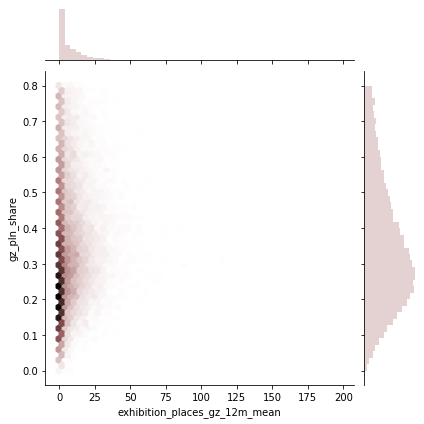

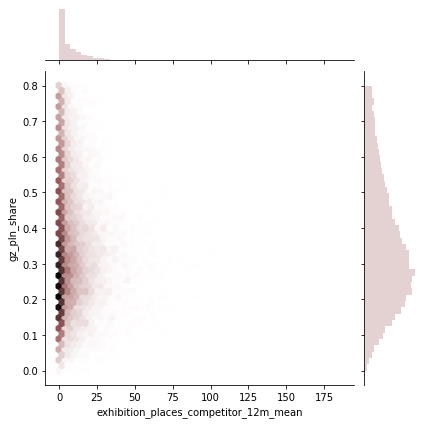

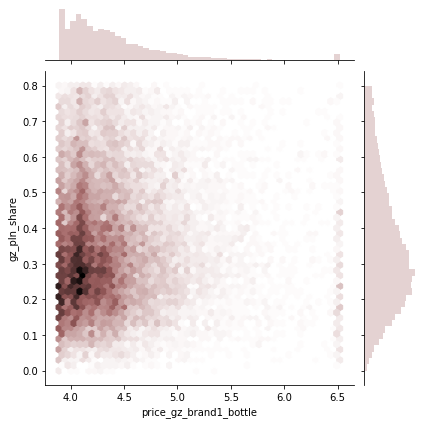

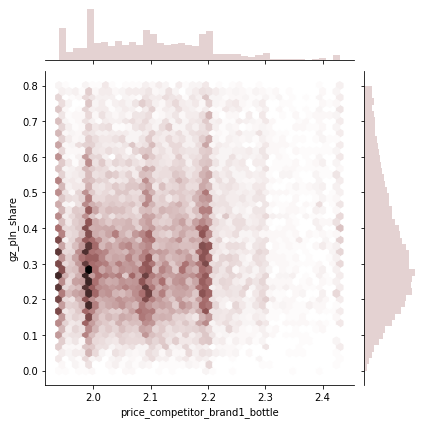

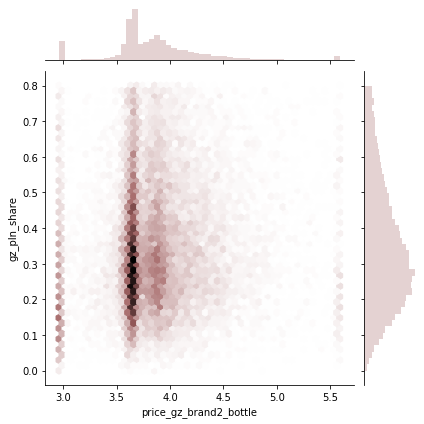

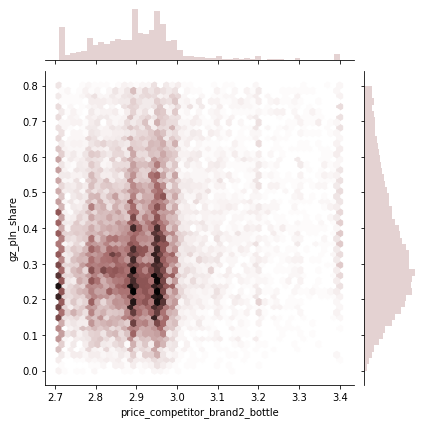

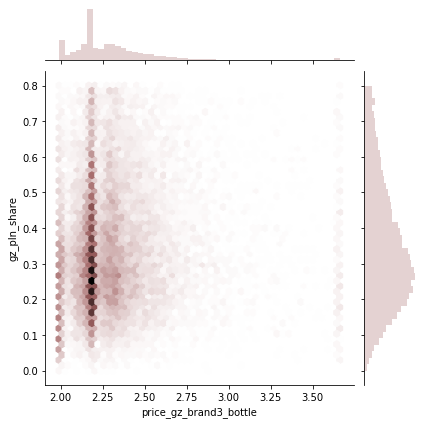

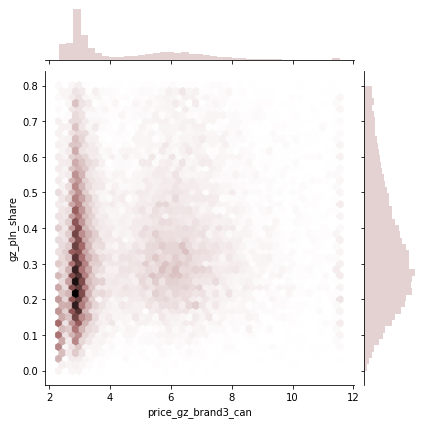

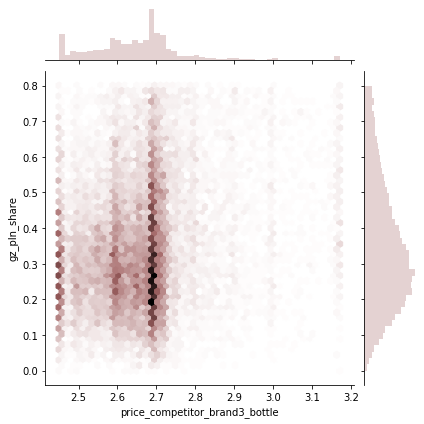

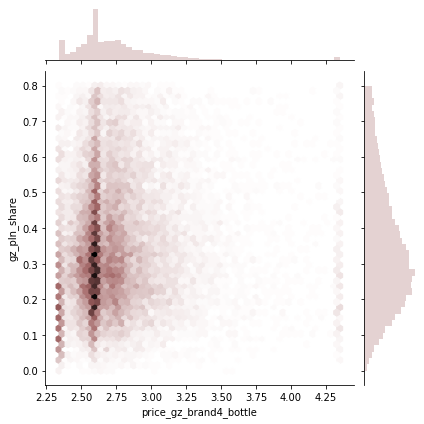

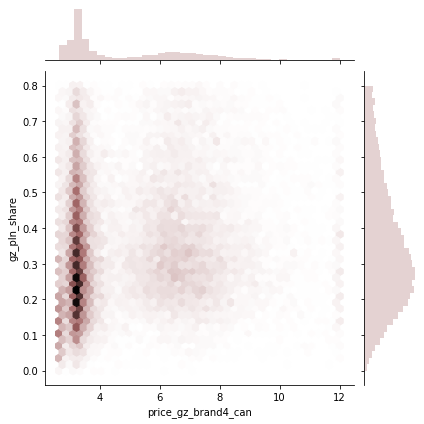

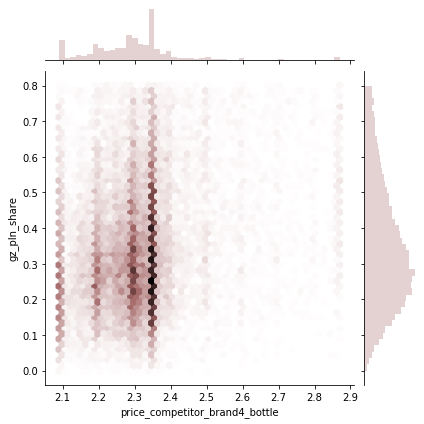

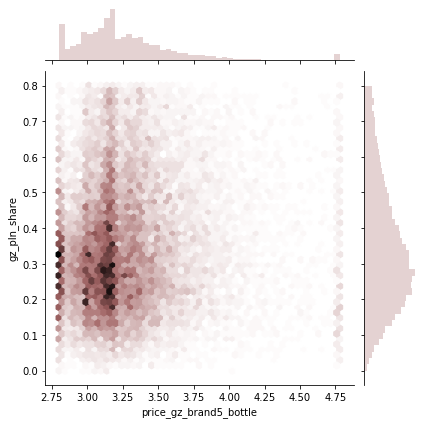

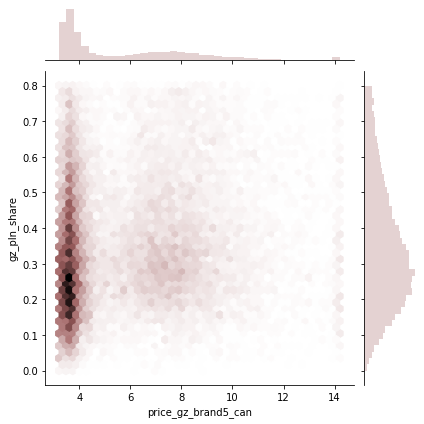

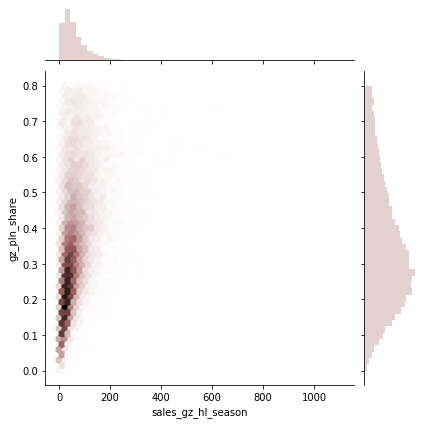

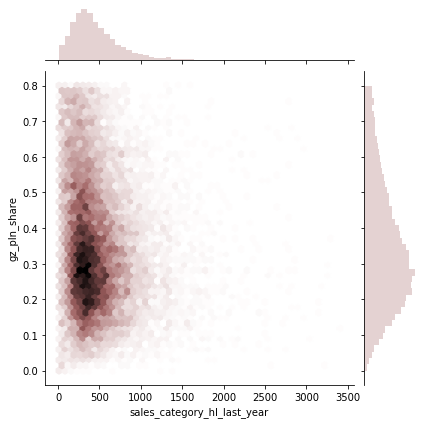

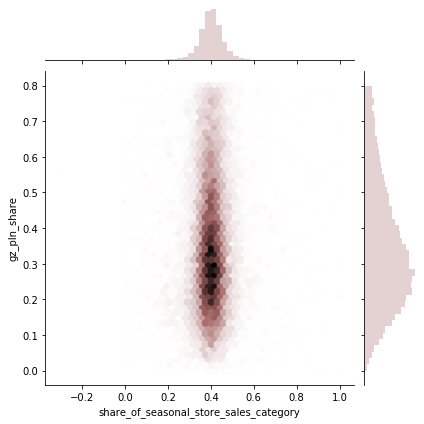

In [9]:
for var in numeric_vars:
    sns.jointplot(var,'gz_pln_share',data=df,kind="hex",color='rosybrown')

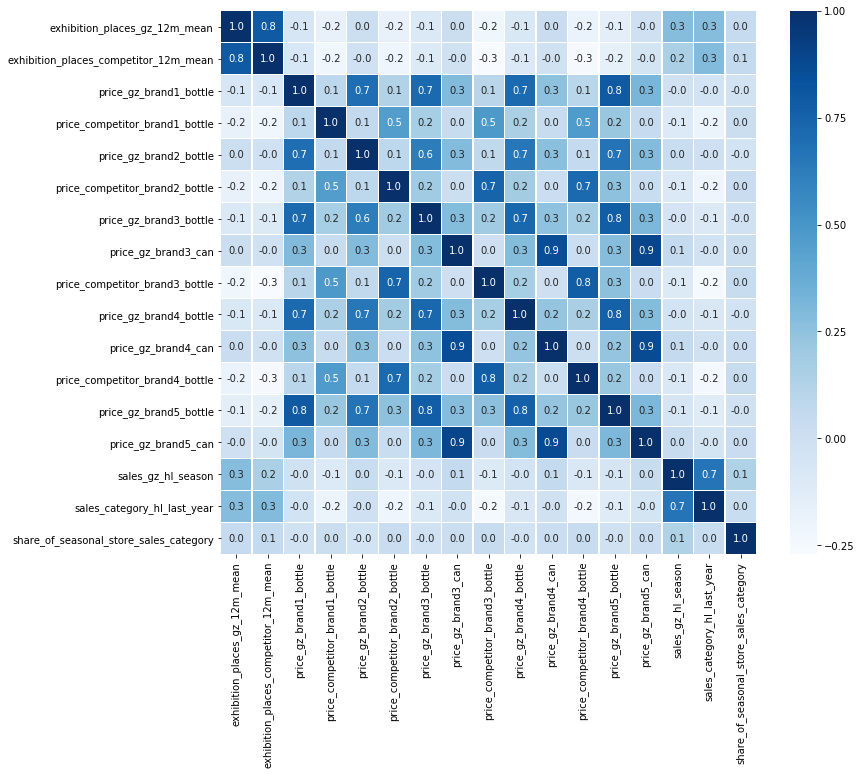

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(X[numeric_vars].corr(), annot=True, fmt=".1f",linewidths=.5,ax=ax,cmap="Blues");


Zmienne kategoryczne

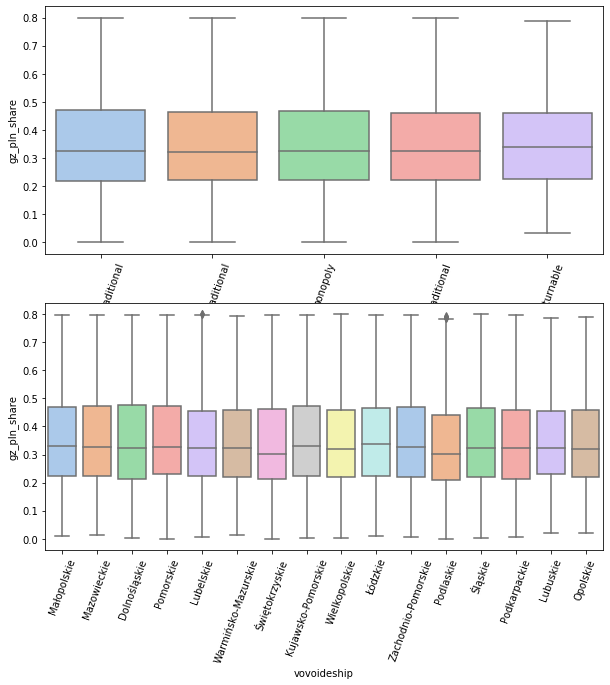

In [11]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
for i,var in enumerate(categorical_vars):
    cat_box=plot=sns.boxplot(data=df,x=var,y='gz_pln_share',ax=ax[i],palette="pastel")
    cat_box.set_xticklabels(cat_box.get_xticklabels(),rotation=70);

In [12]:
df.groupby('vovoideship')['gz_pln_share'].agg(['count','median'])

,count,median
vovoideship,,
Dolnośląskie,1538,0.323817
Kujawsko-Pomorskie,1161,0.330349
Lubelskie,1162,0.323107
Lubuskie,517,0.324978
Mazowieckie,2092,0.326218
Małopolskie,1808,0.329376
Opolskie,451,0.318332
Podkarpackie,1330,0.321922
Podlaskie,534,0.300937


In [13]:
df.groupby('market_segment')['gz_pln_share'].agg(['count','median'])

,count,median
market_segment,,
big_traditional,3369,0.325753
middle_size_traditional,6665,0.324547
monopoly,3349,0.326725
non_returnable,460,0.337854
small_traditional,6139,0.320992


Zmienna celu

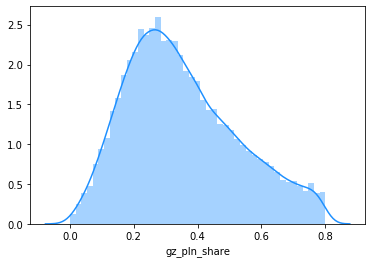

In [14]:
sns.distplot(df['gz_pln_share'],color='dodgerblue');

## Modelowanie

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import clone, BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

C:\Users\wojte\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
# Poniższe klasy zostały napisane w celu wykorzystania pipelinu z sklearn w notacji Pandasowej 
# - wiekszosc z nich jest już zaimplementowane dla numpy

class ImputerMedianValues(BaseEstimator, TransformerMixin):
    """
        Class for imputing missing dataframe values by median
    """
    def __init__(self,features=[]):
        self.features=features
    
    def fit(self, X, y=None):
        return self

    def transform(self, X,y=None):
        X[self.features]=X[self.features].fillna(X[self.features].median())
        return X
    
class DummiesEncoder(BaseEstimator, TransformerMixin):
    """
        Class for dummies categorical variables
    """
    def __init__(self, features=[]):
        self.features=features
        
    def fit(self, X, y=None):
        return self

    def transform(self, X,y=None):
        for col in self.features:
            one_hot = pd.get_dummies(X[col])
            # Drop column as it is now encoded
            X = X.drop(col,axis = 1)
            # Join the encoded df
            X = X.join(one_hot) 
        return X

class MissingEncoder( BaseEstimator, TransformerMixin ):
    """
        ColumnTransformer to encode numerical features with NaNs
    """
    def __init__(self,features=[]):
        self.features=features
        self.features_encoded = [] 
     
    def fit(self,X,y=None ):
        return self 
    
    def transform(self,X,y = None ):
        nan_indicator=X[self.features].isnull().any().tolist() #All columns with NaNs
        self.features_encoded= [x for x, y in zip(self.features, nan_indicator) if y == True]
        for feature in self.features_encoded:
            encoded_feature="null_{}".format(feature)
            X[encoded_feature]=X[feature].isnull().apply(int)
        return X

In [18]:
import networkx as nx

class FeatureSelector(object):
    """
        Class to select most correlated features with target variable from acyclic subgraphs of correlated features
    """
    def __init__(self,threshold=0.7):
        self.threshold=threshold
        self.G=None
        self.subgraphs=None
        self.uncorrelated_features=[]

    def fit(self, X, y):
        corr_df=X.corr().abs()
        corr_df[corr_df>=self.threshold]=1
        corr_df[corr_df<self.threshold]=0
        names=corr_df.index.values
        corr_matrix=np.asmatrix(corr_df)
        self.G=nx.from_numpy_matrix(corr_matrix)
        self.G=nx.relabel_nodes(self.G,lambda x: names[x])
        self.subgraphs=list(nx.connected_component_subgraphs(self.G))
        for subgraph in self.subgraphs:
            subgraph_features=list(subgraph.nodes)
            if len(subgraph_features)>1:
                corr_thresh_max=0
                feature_corr_max=None
                for feature in subgraph_features:
                    corr=X[feature].corr(y_train.iloc[:,0])
                    if corr>corr_thresh_max:
                        corr_thresh_max=corr
                        feature_corr_max=feature
                self.uncorrelated_features.append(feature_corr_max)
            else:
                self.uncorrelated_features.append(subgraph_features[0])
        return self
    
    def transform(self, X, y=None):
        return X[self.uncorrelated_features]

In [19]:
categorical_transformer = Pipeline(steps=[
    ('onehot', DummiesEncoder(features=categorical_vars))
])

numeric_transformer = Pipeline(steps=[
    ('encoding nans',MissingEncoder(features=numeric_vars)),
    ('fill missing values',ImputerMedianValues(features=numeric_vars))
])

preprocessor = Pipeline([
    ('categorical', categorical_transformer),
    ('numeric', numeric_transformer)
    ]
)


In [20]:
pipe = Pipeline(steps=[
                        ('preprocessing',preprocessor),
                        ('feature_selector',FeatureSelector(threshold=0.75)),
                        ('model',RandomForestRegressor(criterion='mae'))
                       ])

In [24]:
grid_params = {
 'model__max_depth': [2,4,8,12],
#  'model__max_features': ['auto', 'sqrt'],
#  'model__min_samples_leaf': [100, 200, 300],
 'model__n_estimators': [50, 100, 200]
}
regr = GridSearchCV(pipe, grid_params,cv = 3,scoring='neg_mean_absolute_error')
regr.fit(X_train, y_train)


In [26]:
regr_best_estimator = regr.best_estimator_
joblib.dump(regr_best_estimator, 'model_gz_share.pkl')
regr_best_estimator

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('categorical',
                                  Pipeline(memory=None,
                                           steps=[('onehot',
                                                   DummiesEncoder(features=['market_segment',
                                                                            'vovoideship']))],
                                           verbose=False)),
                                 ('numeric',
                                  Pipeline(memory=None,
                                           steps=[('encoding nans',
                                                   MissingEncoder(features=['exhibition_places_gz_12m_mean',
                                                                            'exhibition_places_competitor_12m_me...
                 <__main__.FeatureSelector object at 0x000002441CDEFDA0>),
                ('mod

In [27]:
print('Test MAE '+str(mean_absolute_error(y_test,regr_best_estimator.predict(X_test))))

Test MAE 0.0436244376213948


Feature Importance

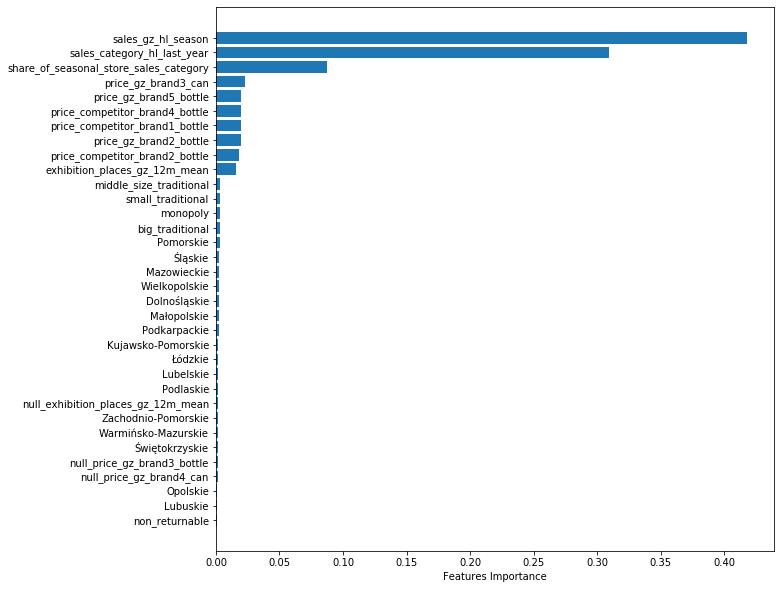

In [28]:
importances=regr_best_estimator[-1].feature_importances_
names=regr_best_estimator.named_steps['feature_selector'].uncorrelated_features

importances, names = zip(*sorted(zip(importances,names)))

plt.figure(figsize=(10,10))
plt.barh(range(len(names)),importances,align='center')
plt.yticks(range(len(names)),names);
plt.xlabel('Features Importance');